Enrollment No : 180280116024 <br>
Sub : DAV

<h1><center>Practical 15 </center></h1>

<B>Aim :</B> Do data analysis for sales of moblie on an E-commerce website.<br>
Prepare your own dataset with at least 20 records in EXCEL with following fields<br>
- customer_ID, name, gender, place, month_of_purchase, brand_of_mobile, cost_of_mobile<br>
Keep some data null. <br><br>
Perform following operations in python<br>
1.Check null fields,put mean value in that.<br>
2.Calculate Mean, Median and Standard Deviation for cost_of_mobile field.<br>
3.Calculate Mode for cost_of_mobile field.<br>
4.Find out month with highest no. of sales of mobile.<br>
5.Display with proper chart for - <br>
    - No. of mobiles sold in each month.
    - Profits earned in each month.
    - Market Share of each Brand.

In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load Dataset
Customer_Data = pd.read_csv('Customer.csv')

In [3]:
#print data
Customer_Data.head()

,customer_ID,name,gender,place,month_of_purchase,brand_of_mobile,cost_of_mobile
0,C1,Beth,F,Amazon,1.0,mi,15000.0
1,C2,Sharon,F,Flipcart,9.0,vivo,10000.0
2,C3,Linda,F,Flipcart,8.0,mi,12000.0
3,C4,Lindsay,F,Amazon,6.0,mi,15000.0
4,C5,Chad,M,Flipcart,9.0,mi,13000.0


## Check null fields,put mean value in that.

In [4]:
#check which column has missing values
Customer_Data.isnull().any()

customer_ID          False
name                 False
gender               False
place                False
month_of_purchase     True
brand_of_mobile      False
cost_of_mobile        True
dtype: bool

In [5]:
#filling missing value by mean
Customer_Data['month_of_purchase'] = Customer_Data['month_of_purchase'].fillna(Customer_Data['month_of_purchase'].mean())
Customer_Data['cost_of_mobile'] = Customer_Data['cost_of_mobile'].fillna(Customer_Data['cost_of_mobile'].mean())

In [6]:
Customer_Data.isnull().any()

customer_ID          False
name                 False
gender               False
place                False
month_of_purchase    False
brand_of_mobile      False
cost_of_mobile       False
dtype: bool

## Calculate Mean, Median and Standard Deviation for cost_of_mobile field.

In [7]:
print("Mean : ",Customer_Data['cost_of_mobile'].mean())
print("Median : ",Customer_Data['cost_of_mobile'].median())
print("Standard Deviation : ",Customer_Data['cost_of_mobile'].std())

Mean :  21608.695652173916
Median :  17000.0
Standard Deviation :  12123.459113205487


## Calculate Mode for cost_of_mobile field.

In [8]:
print("Mode : ",Customer_Data['cost_of_mobile'].mode())

Mode :  0    12000.0
1    15000.0
dtype: float64


Here, We got 2 mode value for cost_of_mobile field.
Which means cost_of_mobile field is bimodal.

## Find out month with highest no. of sales of mobile.

In [9]:
Customer_Data['month_of_purchase'].value_counts()

10.000000    4
5.000000     4
9.000000     3
6.913043     2
4.000000     2
6.000000     2
8.000000     2
3.000000     1
2.000000     1
7.000000     1
11.000000    1
12.000000    1
1.000000     1
Name: month_of_purchase, dtype: int64

So, We can say that Month 5 and 10 has highest no. of sales of mobiles

## Display with proper chart for

### 1. No. of mobiles sold in each month

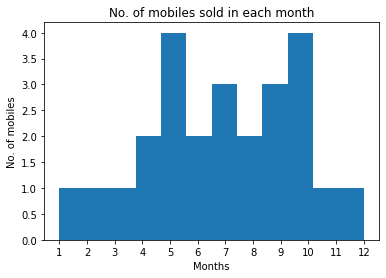

In [10]:
#plot hist chart for month and no.of mobiles

plt.hist(Customer_Data['month_of_purchase'], bins=12)
plt.title("No. of mobiles sold in each month")
plt.xlabel("Months")
plt.ylabel("No. of mobiles")
plt.xticks(range(1,13))
plt.show()

### 2. Profits earned in each month

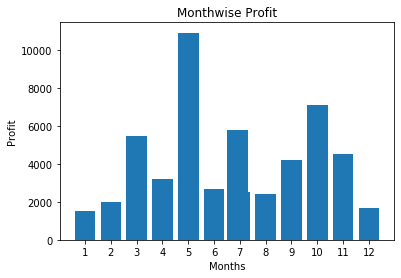

In [11]:
#plot bar chart for profit monthwise.
#let's say profit is 10% of value.

Customer_Data['Profit'] = Customer_Data['cost_of_mobile']*0.1

Profit = Customer_Data.groupby(['month_of_purchase']).sum()

plt.bar(Profit.index, Profit.Profit)
plt.xticks(range(1,13))
plt.title("Monthwise Profit")
plt.xlabel('Months')
plt.ylabel('Profit')
plt.show()

### 3. Market Share of each Brand.

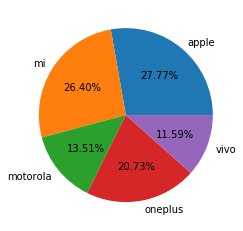

In [12]:
#Pie chart brandwise data
BrandWise = Customer_Data.groupby(['brand_of_mobile']).sum()

plt.pie(BrandWise['cost_of_mobile'], labels = BrandWise.index,autopct='%1.2f%%')
plt.show()